# Notebook B: Clustering and Dimension Reduction
In this notebook, we explore the application of dimension reduction techniques on the [Wine dataset](https://archive.ics.uci.edu/dataset/109/wine), a classic dataset in machine learning. We will standardize the dataset, apply KMeans clustering, and visualizing the results with principal component analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE). Additionally, we will introduce Linear Discriminant Analysis (LDA) as another dimension reduction technique to compare its effectiveness against PCA and t-SNE. This exercise aims to provide insights into the dataset's structure and the distinct groups within the wine samples.

### Setup imports

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

### Load data set
Use the `sklearn.datasets.load_wine()` function to load the Wine dataset. Convert it into a pandas DataFrame for easier manipulation and visualization. Add a column to the data frame for the target.

In [ ]:
# import data
# pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 

Note: you may need to restart the kernel to use updated packages.


### Data Preprocessing
Standardize the features of the Wine dataset using the standard scaler. 

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Exploratory Data Analysis
Perform exploratory data analysis on the Wine dataset. Visualize the distribution of a couple of the alcohol content and malic acid content using histograms.

In [13]:
# checking column names
print("Column names:", X.columns.tolist())

Column names: ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']


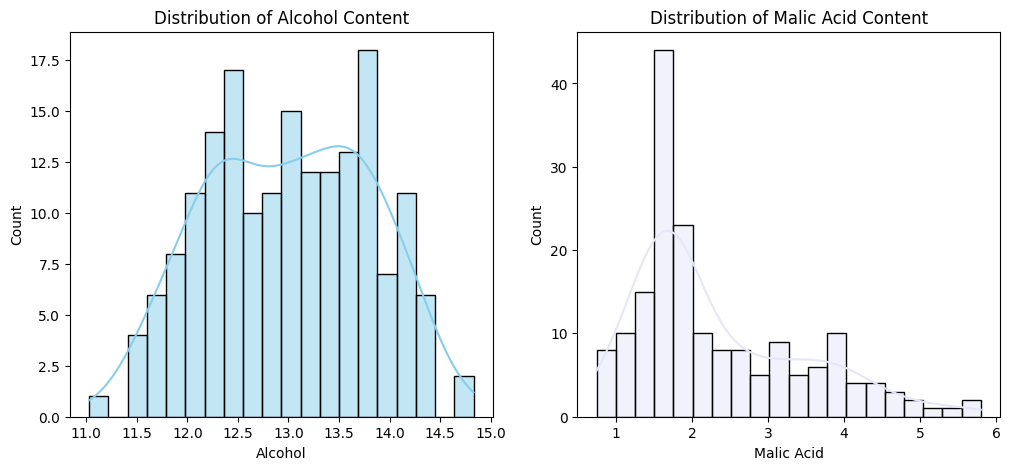

In [18]:

# plot histograms of Alcohol and Malic acid content
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# alcohol content
sns.histplot(X["Alcohol"], kde=True, bins=20, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Alcohol Content")
axes[0].set_xlabel("Alcohol")

# malic acid content
sns.histplot(X["Malicacid"], kde=True, bins=20, ax=axes[1], color='lavender')
axes[1].set_title("Distribution of Malic Acid Content")
axes[1].set_xlabel("Malic Acid")

plt.show()

### Clustering with KMeans
Apply KMeans clustering on the standardized features of the Wine dataset. Use three clusters to separate the data and random state = 42. Add a column to the `wine_df` for the Kmeans cluster each point is in.

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

### Dimension Reduction with PCA
Apply PCA on the standardized Wine dataset to reduce its dimensions. Visualize the data in the first two principal components and color the points by their KMeans cluster. How well do the PCA components represent the clusters?

The points do not overlap too much and each cluster group is distinct so the PCA components do well on representing the clusters.

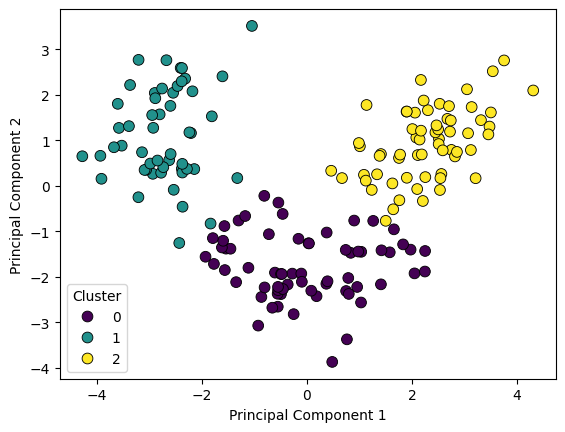

In [21]:
# apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()

# plot PCA-reduced data, colored by KMeans clusters
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=clusters,
    palette='viridis',
    edgecolor='k',
    s=60
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


### t-SNE Visualization
Now apply t-SNE to the standardized Wine dataset and visualize the result using random_state = 42. Color the points based on their labels from the target column. How does the t-SNE visualization compare to the PCA visualization in terms of cluster separation?

Compare to the PCA, the t-SNE visualization did not separate the clusters as well as PCA. Some cluster 2 points are off and mixing/overlapping with cluster 1 and 3.

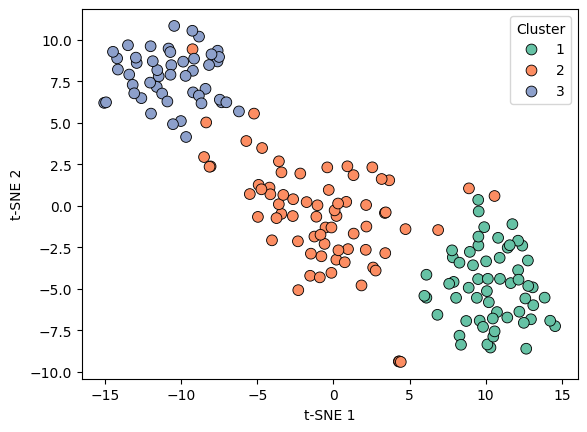

In [25]:
# apply t-SNE 
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

y = wine.data.targets.iloc[:, 0]

plt.figure()

# plot t-SNE results, colored by true class labels (y)
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=y,
    palette='Set2',
    edgecolor='k',
    s=60
)

plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster")
plt.show()


### Dimension Reduction with LDA

Linear Discriminant Analysis (LDA) is a technique used to reduce dimensions of the dataset while preserving as much class discriminatory information as possible. Unlike PCA, which does not consider the class labels when finding the principal components, LDA aims to provide the best class separability. Let's apply LDA to the Wine dataset and observe how it compares with PCA in terms of class separation.

Then create a plot with LDA clusters where the points are colored based on the `wine_df` target column

LDA application made each class even more distinct comepares with PCA and no overlapping at all.

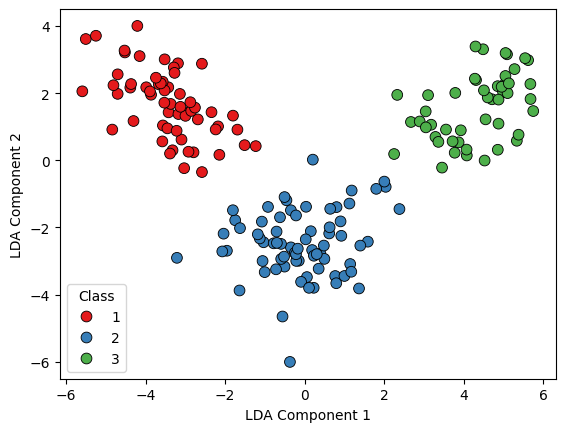

In [29]:
wine = fetch_ucirepo(id = 109)
X = wine.data.features
y = wine.data.targets.squeeze() 

X_scaled = StandardScaler().fit_transform(X)

# apply LDA to reduce to dimension
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure()

sns.scatterplot(
    x=X_lda[:, 0],
    y=X_lda[:, 1],
    hue=y,
    palette='Set1',
    edgecolor='k',
    s=60
)

plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(title="Class")
plt.show()


### End of Notebook A